In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import seaborn as sns

In [2]:
# Read the csv file
df_B = pd.read_csv("selected_diagnosis_3.csv")
df_B.head()

,Radius mean,Texture mean,Smoothness mean,Compactness mean,Concavity mean,Symmetry mean,Fractal Dimension mean,Radius SE,Texture SE,Smoothness SE,...,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Smoothness worst,Compactness worst,Concavity worst,Symmetry worst,Fractal Dimension worst,Diagnosis
0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,M
1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,M
2,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,M
3,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,M
4,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,0.8902,0.007510,...,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.5355,0.3985,0.12440,M


In [3]:
# sns.pairplot(df_B, hue="Diagnosis")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
# Prepare target data
target = df_B["Diagnosis"]
target_names = ["malignant", "benigh"]
target_B = target.map({'M': 1, 'B': 0})
target_B.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [5]:
# Prepare feature data
data_B = df_B.drop("Diagnosis", axis=1)
feature_names_B = data_B.columns
data_B.head()

,Radius mean,Texture mean,Smoothness mean,Compactness mean,Concavity mean,Symmetry mean,Fractal Dimension mean,Radius SE,Texture SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Smoothness worst,Compactness worst,Concavity worst,Symmetry worst,Fractal Dimension worst
0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
2,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
3,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678
4,12.45,15.70,0.12780,0.17000,0.1578,0.2087,0.07613,0.3345,0.8902,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,0.1791,0.5249,0.5355,0.3985,0.12440


In [6]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_B, target_B, random_state=42)

In [7]:
# StandardScaler, we use it when we don't know everything about the data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [8]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

# Support Vector Machine

In [9]:
# Import Support vector machine linear classifier
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Model Accuracy
print("Test Acc: %.3f" % model.score(X_test, y_test))

Test Acc: 0.979


In [11]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                           target_names=target_names))

             precision    recall  f1-score   support

  malignant       0.97      1.00      0.98        87
     benigh       1.00      0.95      0.97        55

avg / total       0.98      0.98      0.98       142



# Logistic Regression

In [12]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# Fit the model to the training set
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Calculate the scores for the training and test sets
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9859154929577465
Test Score: 0.9647887323943662


In [15]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions: [1 0 1 0 0 0 0 1 1 0]
First 10 Actual labels: [1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [16]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


# K Nearest Neighbor

k: 1, Train/Test Score: 1.000/0.937
k: 3, Train/Test Score: 0.972/0.951
k: 5, Train/Test Score: 0.972/0.944
k: 7, Train/Test Score: 0.969/0.972
k: 9, Train/Test Score: 0.969/0.958
k: 11, Train/Test Score: 0.962/0.972
k: 13, Train/Test Score: 0.960/0.965
k: 15, Train/Test Score: 0.958/0.958
k: 17, Train/Test Score: 0.955/0.951
k: 19, Train/Test Score: 0.951/0.930


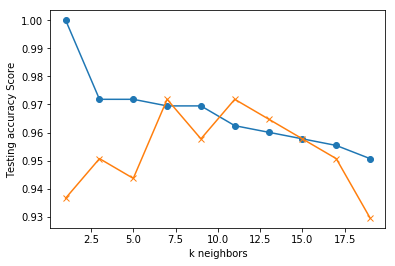

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
train_scores =[]
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker="o")
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# k = 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("k=7 Test Acc: %.3f" % knn.score(X_test, y_test))

k=7 Test Acc: 0.972


# Decision Tree & Random Forest

In [19]:
from sklearn import tree

# Create a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9014084507042254

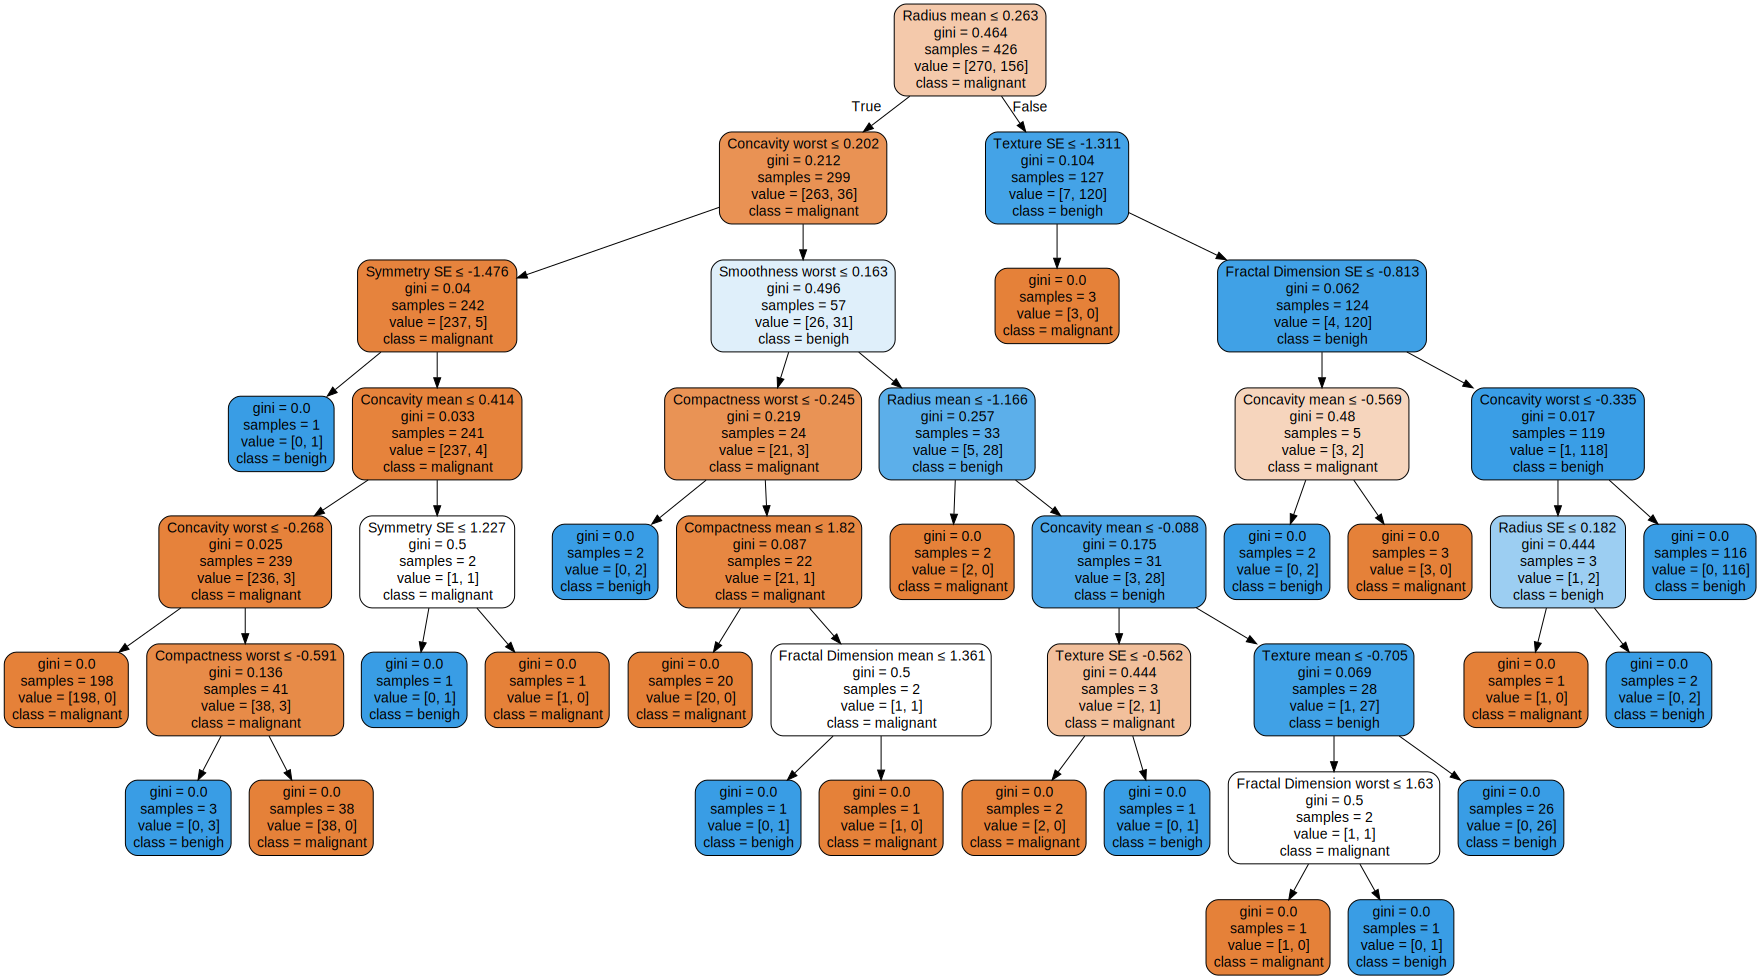

In [20]:
# Use graphviz to visualize the tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names = feature_names_B,
    class_names = target_names,
    filled=True, rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [21]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9436619718309859

In [22]:
# Sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names_B), reverse=True)

[(0.2460370232884582, 'Radius mean'),
 (0.14631509840612092, 'Concavity mean'),
 (0.12861950500780162, 'Concavity worst'),
 (0.07640011948489117, 'Radius SE'),
 (0.06703516439685335, 'Compactness mean'),
 (0.056825163877734265, 'Texture mean'),
 (0.05139103258607337, 'Compactness worst'),
 (0.035033360801908546, 'Concavity SE'),
 (0.02716262232588861, 'Smoothness worst'),
 (0.02463613521392237, 'Fractal Dimension mean'),
 (0.020506508433687894, 'Concave Points SE'),
 (0.019997627432770327, 'Symmetry worst'),
 (0.015525076545543975, 'Fractal Dimension SE'),
 (0.014956111141358737, 'Smoothness mean'),
 (0.013693798338123684, 'Compactness SE'),
 (0.013315116416226918, 'Texture SE'),
 (0.013143640391549128, 'Fractal Dimension worst'),
 (0.011336447506917485, 'Symmetry SE'),
 (0.00979783988290331, 'Smoothness SE'),
 (0.0082726085212663, 'Symmetry mean')]

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [24]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[83,  4],
       [ 9, 46]])

In [26]:
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Test Score: {classifier.score(X_test, y_test)}")

Training Score: 0.9225352112676056
Test Score: 0.9084507042253521


# Deep Learning

In [27]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

//anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=20))
model.add(Dense(units=2, activation='softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Fit the model to the training data
model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 1.1880 - acc: 0.3192
Epoch 2/100
 - 0s - loss: 1.0393 - acc: 0.3357
Epoch 3/100
 - 0s - loss: 0.9164 - acc: 0.3638
Epoch 4/100
 - 0s - loss: 0.8176 - acc: 0.4085
Epoch 5/100
 - 0s - loss: 0.7322 - acc: 0.4601
Epoch 6/100
 - 0s - loss: 0.6674 - acc: 0.5469
Epoch 7/100
 - 0s - loss: 0.6117 - acc: 0.6620
Epoch 8/100
 - 0s - loss: 0.5659 - acc: 0.7113
Epoch 9/100
 - 0s - loss: 0.5266 - acc: 0.7535
Epoch 10/100
 - 0s - loss: 0.4915 - acc: 0.7817
Epoch 11/100
 - 0s - loss: 0.4603 - acc: 0.8122
Epoch 12/100
 - 0s - loss: 0.4314 - acc: 0.8427
Epoch 13/100
 - 0s - loss: 0.4055 - acc: 0.8662
Epoch 14/100
 - 0s - loss: 0.3811 - acc: 0.8779
Epoch 15/100
 - 0s - loss: 0.3585 - acc: 0.8944
Epoch 16/100
 - 0s - loss: 0.3376 - acc: 0.9061
Epoch 17/100
 - 0s - loss: 0.3187 - acc: 0.9108
Epoch 18/100
 - 0s - loss: 0.3004 - acc: 0.9155
Epoch 19/100
 - 0s - loss: 0.2843 - acc: 0.9225
Epoch 20/100
 - 0s - loss: 0.2694 - acc: 0.9272
Epoch 21/100
 - 0s - loss: 0.2552 - acc: 0.9319
E

For this network, we simply add an additional hidden layer of 6 nodes

In [32]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=20))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [33]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 126       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 14        
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [34]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 0.7512 - acc: 0.4859
Epoch 2/100
 - 0s - loss: 0.6512 - acc: 0.6362
Epoch 3/100
 - 0s - loss: 0.5855 - acc: 0.7160
Epoch 4/100
 - 0s - loss: 0.5395 - acc: 0.7676
Epoch 5/100
 - 0s - loss: 0.5012 - acc: 0.7911
Epoch 6/100
 - 0s - loss: 0.4686 - acc: 0.8146
Epoch 7/100
 - 0s - loss: 0.4373 - acc: 0.8286
Epoch 8/100
 - 0s - loss: 0.4086 - acc: 0.8404
Epoch 9/100
 - 0s - loss: 0.3820 - acc: 0.8615
Epoch 10/100
 - 0s - loss: 0.3564 - acc: 0.8756
Epoch 11/100
 - 0s - loss: 0.3321 - acc: 0.8873
Epoch 12/100
 - 0s - loss: 0.3102 - acc: 0.8991
Epoch 13/100
 - 0s - loss: 0.2889 - acc: 0.9085
Epoch 14/100
 - 0s - loss: 0.2707 - acc: 0.9155
Epoch 15/100
 - 0s - loss: 0.2544 - acc: 0.9225
Epoch 16/100
 - 0s - loss: 0.2385 - acc: 0.9319
Epoch 17/100
 - 0s - loss: 0.2251 - acc: 0.9343
Epoch 18/100
 - 0s - loss: 0.2129 - acc: 0.9343
Epoch 19/100
 - 0s - loss: 0.2014 - acc: 0.9460
Epoch 20/100
 - 0s - loss: 0.1910 - acc: 0.9460
Epoch 21/100
 - 0s - loss: 0.1815 - acc: 0.9460
E

# Compare the models below

In [35]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.12221518084800369, Accuracy: 0.9788732394366197


In [36]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Deep Neural Network - Loss: 0.2027558407313387, Accuracy: 0.9366197183098591
